<a href="https://colab.research.google.com/github/komalagnihotri18/SHALA_Assgn/blob/master/Assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

**Importing Libraries  :**

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading all the dataset  :**

In [0]:
url_titanic = 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv'
titanic_data = pd.read_csv(url_titanic)

**Printing the top 5 rows of dataset  :**

In [0]:
# Getting shape of data=========================
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Sometimes there are missing values found in dataset, we should know the number of missing values in every column, that is shown below :**

In [0]:
# Getting the information of missing data==========
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
# Converting data into dataframe===================
df = pd.DataFrame(titanic_data)

**Filling missing Data with their Median and Mode  :**


*   Missing value of Age is replaced by their median .
*   Missing value of Fare is replaced by their median .
*   Missing value of Embarked is replaced by their mode .





In [0]:
#for dataset in df:    
#complete missing age with median
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

**Dropping Unimportant Columns which are unlikely significant :**

In [0]:
df=df.drop(['PassengerId','Name','Survived','Cabin'],axis=1)
X=df.iloc[:,:].values
X=pd.DataFrame(X)
y=titanic_data.loc[:,['Survived']].values
X

,0,1,2,3,4,5,6,7
0,3,male,22,1,0,A/5 21171,7.25,S
1,1,female,38,1,0,PC 17599,71.2833,C
2,3,female,26,0,0,STON/O2. 3101282,7.925,S
3,1,female,35,1,0,113803,53.1,S
4,3,male,35,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...
886,2,male,27,0,0,211536,13,S
887,1,female,19,0,0,112053,30,S
888,3,female,28,1,2,W./C. 6607,23.45,S
889,1,male,26,0,0,111369,30,C


**Pre-processing of data  :**

*   Using Label Encoder to convert object data into Numeric Data
*   Splitting data into training and testing data



In [0]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label=LabelEncoder()
X[1]=label.fit_transform(X[1])
X[5]=label.fit_transform(X[5])
X[7]=label.fit_transform(X[7])


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state=42,shuffle=True)
print('the size of the training set{}'.format(x_train.shape))
print('='*70)
print('the size of the validation set{}'.format(x_val.shape))
print('='*70)

the size of the training set(712, 8)
the size of the validation set(179, 8)


**Fitting the data with Decision Tree Classifier and testing it**

---


*   Getting Confusion matrix
*   Getting Classification matrix
*   Getting Accuracy Score





In [0]:
# Importing Decision 
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
Classifier.fit(x_train,y_train)
y_pred_decision=Classifier.predict(x_val)
#print(y_pred_decision)
#print(len(y_pred_decision))     

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using Decision Tree Classifier: '+ str(confusion_matrix(y_val,y_pred_decision)))
print('='*70)
print('Classification report using Decision Tree Classifier: '+str(classification_report(y_val,y_pred_decision)))
print('='*70)
print('Accuracy score using Decision Tree Classifier: '+str(accuracy_score(y_val,y_pred_decision)))
print('='*70)

Confusion Matrix using Decision Tree Classifier: [[80 25]
 [22 52]]
Classification report using Decision Tree Classifier:               precision    recall  f1-score   support

           0       0.78      0.76      0.77       105
           1       0.68      0.70      0.69        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Accuracy score using Decision Tree Classifier: 0.7374301675977654


**Fitting the data with Random Forest Classifier and testing it**

---


*   Getting Confusion matrix
*   Getting Classification matrix
*   Getting Accuracy Score





In [0]:
from sklearn.ensemble import RandomForestClassifier
Classifier1=RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=0)
Classifier1.fit(x_train,y_train)
y_pred_RandomForest=Classifier1.predict(x_val)
#print(y_pred_RandomForest)
#print(len(y_pred_RandomForest))  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using Random Forest Classifier: '+ str(confusion_matrix(y_val,y_pred_RandomForest)))
print('='*70)
print('Classification report using Random Forest Classifier: '+str(classification_report(y_val,y_pred_RandomForest)))
print('='*70)
print('Accuracy score using Random Forest Classifier: '+str(accuracy_score(y_val,y_pred_RandomForest)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix using Random Forest Classifier: [[93 12]
 [21 53]]
Classification report using Random Forest Classifier:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Accuracy score using Random Forest Classifier: 0.8156424581005587


**Fitting the data with AdaBoost Classifier and testing it**

---


*   Getting Confusion matrix
*   Getting Classification matrix
*   Getting Accuracy Score





In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=500)
bbdt=bdt.fit(x_train, y_train)
y_pred1=bbdt.predict(x_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using AdaBoost Classifier: '+ str(confusion_matrix(y_val,y_pred1)))
print('='*70)
print('Classification report using AdaBoost Classifier: '+str(classification_report(y_val,y_pred1)))
print('='*70)
print('Accuracy score using AdaBoost Classifier: '+str(accuracy_score(y_val,y_pred1)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix using AdaBoost Classifier: [[93 12]
 [18 56]]
Classification report using AdaBoost Classifier:               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy score using AdaBoost Classifier: 0.8324022346368715


**Exploratory Data Analysis**
*  Pie chart for Gender Distribution
*  Bar plot showing survived/non-survived status
*  Bar plot over Age Distribution

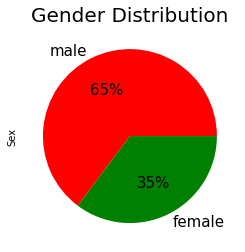

In [0]:
# Exploratory Data Analysis
titanic_data['Sex'].value_counts().plot(kind='pie', autopct='%1.0f%%',colors=['red','green'],fontsize=15)
plt.title('Gender Distribution',fontsize=20)
plt.show()

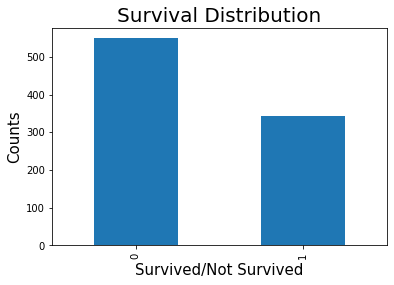

In [0]:
titanic_data['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution',fontsize=20)
plt.xlabel('Survived/Not Survived',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

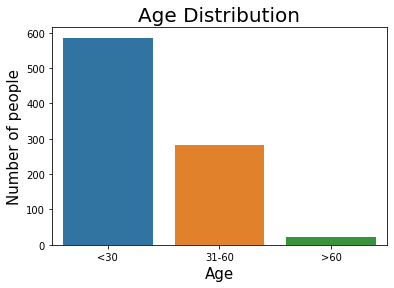

In [0]:
age0_30 = titanic_data['Age'][(titanic_data['Age']>0) & (titanic_data['Age']<=30)]
age31_60 = titanic_data['Age'][(titanic_data['Age']>30) & (titanic_data['Age']<=60)]
age61_90 = titanic_data['Age'][(titanic_data['Age']>60) & (titanic_data['Age']<=90)]
x=['<30','31-60','>60']
y=[len(age0_30),len(age31_60),len(age61_90)]
sns.barplot(x,y)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.title('Age Distribution',fontsize=20)
plt.show()